In [4]:
#Basic Libraries

import pandas as pd
import numpy as np
import re
import numpy
import warnings
warnings.filterwarnings('ignore')
# For NLP & Preprocessing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS #Better stopwords here
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
#Visualizations

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [5]:
from google.colab import files

In [6]:
uploded =files.upload()

Saving emails1 (1).csv to emails1 (1).csv


In [7]:
df= pd.read_csv('emails1 (1).csv')

In [8]:
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [10]:
df.shape

(48076, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [12]:
df.drop(['filename', 'Message-ID'],axis=1,inplace=True)
df

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [13]:
abusive=df[df['Class']=='Abusive']
abusive

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
3405,There is a lot of confused bullshit floating a...,Abusive
3406,"wow, three weeks away from the kids ! brave an...",Abusive
3407,\ngot this from late friday. have you ever hea...,Abusive
3408,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive


In [14]:
non_abusive=df[df['Class']=='Non Abusive']
non_abusive

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [15]:
non_abusive[non_abusive.duplicated()]

,content,Class
4014,---------------------- Forwarded by Phillip K ...,Non Abusive
4015,---------------------- Forwarded by Phillip K ...,Non Abusive
4016,"Dave, \n\n Here are the names of the west desk...",Non Abusive
4017,"Paula,\n\n 35 million is fine\n\nPhillip",Non Abusive
4018,---------------------- Forwarded by Phillip K ...,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [16]:
non_abusive=non_abusive.drop_duplicates()
non_abusive


,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
47974,Do you need new leads for your business ?\n D...,Non Abusive
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [17]:
df=pd.concat([abusive,non_abusive]).reset_index(drop=True)
df

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
26419,Do you need new leads for your business ?\n D...,Non Abusive
26420,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
26421,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
26422,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [18]:
# Check the columns
df.columns

Index(['content', 'Class'], dtype='object')

In [19]:
# Change datatype of the text column to string
df['content'] =df['content'].astype(str)

In [20]:
import regex
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
# Create a function to create a wordcloud
def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off")
    plt.title(title, fontsize=60)
    plt.show()

In [22]:
# Process the text using NLP methods
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

# Create a function to filter text
def filter_content(content, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(content.lower())
    filtered_content = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_content = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_content if not w in stop_words]
    return " ".join(filtered_content)

In [46]:
# Create a filtered_text column and add filtered text data
df["filtered_content"] = df.content.apply(lambda x : filter_content(x, stop))
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,Class,filtered_content
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,shit john lavorato excelr john arnold subject ...
1,fuck you,Abusive,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentlemen follow champagne available approxima...
3,sorry i've taken so long...just been trying to...,Abusive,sorry take long try fend chicks life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john lavorato excelr john arnold subje...


In [24]:
# Loop over filtered text in each row and create a word list
word_list = []
for text in df["filtered_content"]:
    temp = text.split(" ")
    word_list.append(temp)

# Print the word list
word_list[0:2]

[['shit',
  'john',
  'lavorato',
  'excelr',
  'john',
  'arnold',
  'subject',
  'football',
  'bet',
  'minn',
  'buff',
  'phil',
  'indi',
  'cinnci',
  'clev',
  'dall',
  'jack'],
 ['fuck']]

In [25]:
# Import gensim and relevant dependencies
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Create Dictionary
id2word = corpora.Dictionary(word_list)

# Create Corpus
texts = word_list

# Term Document Frequency
corpus = [id2word.doc2bow(content) for content in texts]

# View
corpus[1:2]

[[(16, 1)]]

In [27]:
# Install pyLDAvis
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97717 sha256=8e0a4656a2dc1f87dfef5e9a8e320f45157a3f0cdeab1338e0022fcf8559387c
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [28]:
#Import PPrint
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.045*"excelr" + 0.011*"subject" + 0.009*"meet" + 0.009*"time" + '
  '0.008*"send" + 0.008*"thank" + 0.007*"schedule" + 0.007*"original" + '
  '0.007*"message" + 0.006*"lynn"'),
 (1,
  '0.012*"nyiso" + 0.010*"market" + 0.006*"http" + 0.005*"would" + '
  '0.005*"time" + 0.004*"excelr" + 0.004*"price" + 0.004*"make" + '
  '0.004*"trade" + 0.004*"company"'),
 (2,
  '0.055*"font" + 0.025*"http" + 0.020*"size" + 0.017*"color" + 0.012*"arial" '
  '+ 0.011*"face" + 0.010*"align" + 0.010*"href" + 0.008*"class" + '
  '0.007*"width"'),
 (3,
  '0.023*"image" + 0.011*"http" + 0.011*"please" + 0.008*"excelr" + '
  '0.008*"click" + 0.007*"mail" + 0.007*"receive" + 0.006*"list" + '
  '0.006*"information" + 0.006*"view"')]


In [29]:
# Create a visualization for LDA Model using pyLDAvis
import pyLDAvis.gensim
%matplotlib inline
import pickle

In [30]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.004347 -0.059394       1        1  37.276665
0     -0.149874  0.064767       2        1  28.941768
3      0.014444 -0.081380       3        1  18.978890
2      0.139777  0.076007       4        1  14.802677, topic_info=         Term          Freq         Total Category  logprob  loglift
10180    font  28498.000000  28498.000000  Default  30.0000  30.0000
6      excelr  57660.000000  57660.000000  Default  29.0000  29.0000
2929    image  19181.000000  19181.000000  Default  28.0000  28.0000
205      http  28444.000000  28444.000000  Default  27.0000  27.0000
1518     size  11490.000000  11490.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
3369     html   1884.414240   3355.130136   Topic4  -5.6066   1.3335
2929    image   3481.596009  19181.281985   Topic4  -4.9928   0.2039
739      free   2304.624111   7356.969665   Topic4  -5.4053   0.7496
3592   update   2183.661731   6513.947126   Topic4  -5.4593   0.8174
6      excelr   2307.889349  57660.523777   Topic4  -5.4039  -1.3079

[377 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
15093      3  0.982416         
15093      4  0.012436         
1004       1  0.368819  account
1004       2  0.132242  account
1004       3  0.455245  account
...      ...       ...      ...
2623       4  0.059781     york
3109       1  0.001914    zadow
3109       2  0.981666    zadow
3109       3  0.015309    zadow
3109       4  0.001914    zadow

[1158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

In [31]:
# Import WordCloud
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


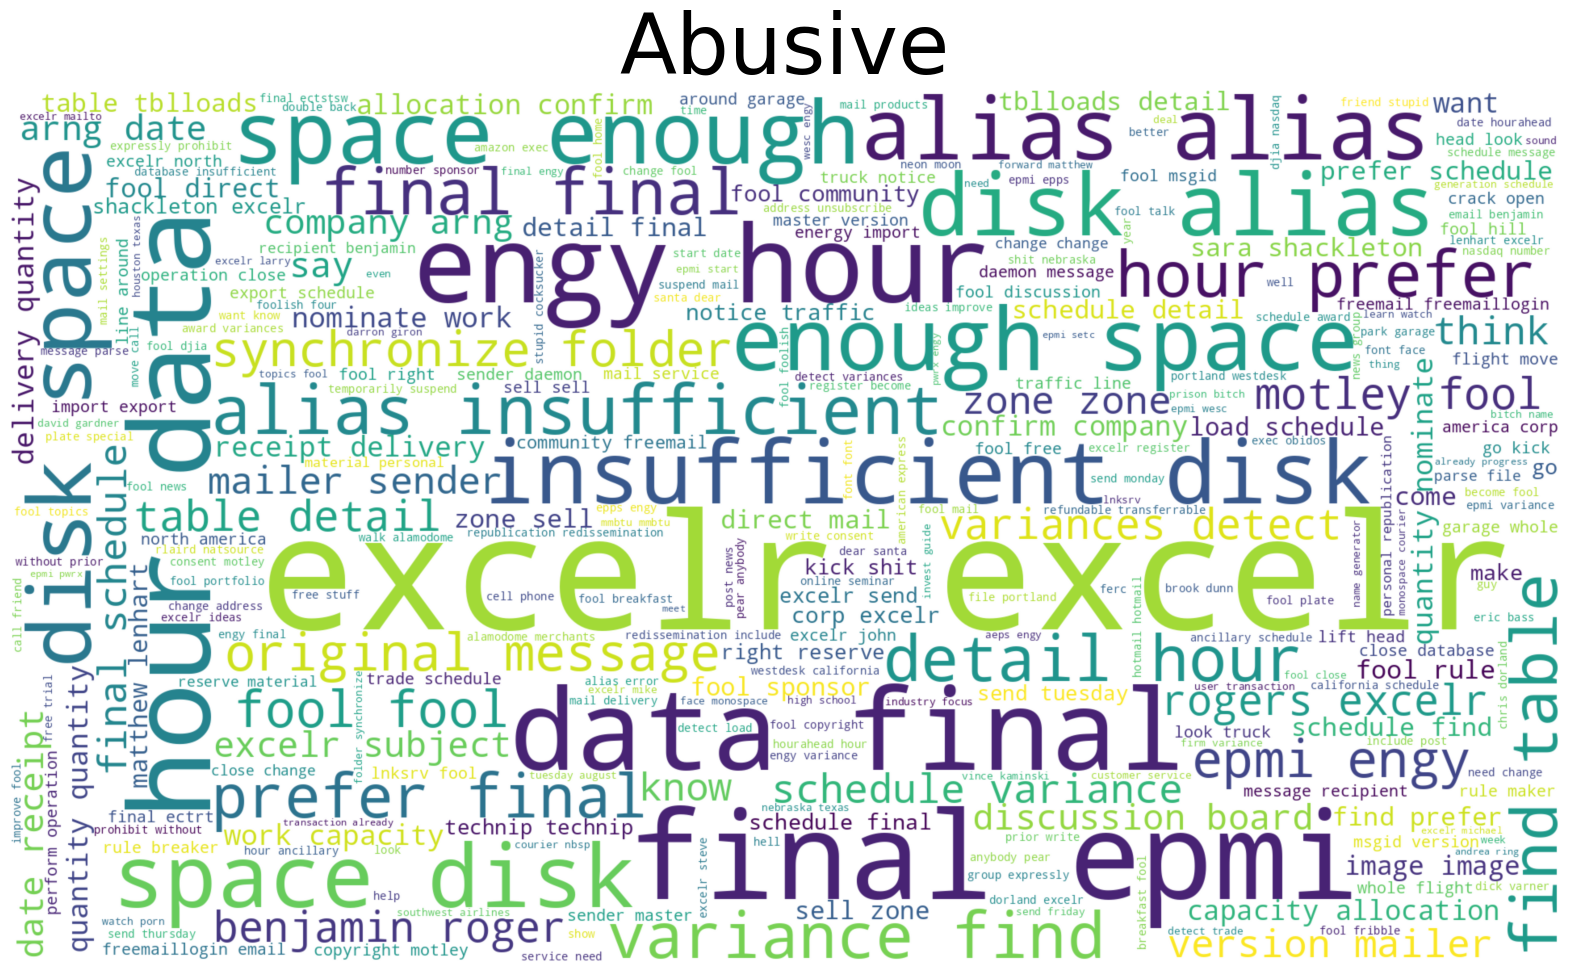

In [34]:
# Create a wordcloud for Crime class
all_text = " ".join(df[df["Class"] =="Abusive"].filtered_content)
make_wordcloud(all_text, "Abusive")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='words'>

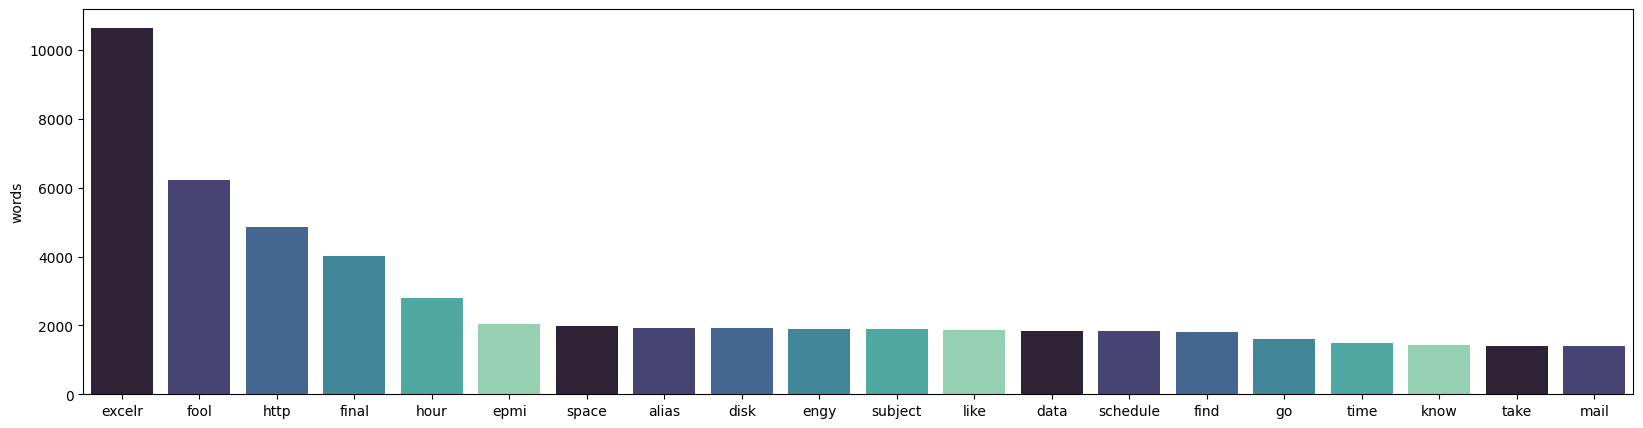

In [35]:
# Create a graph for Abusive class
count = pd.DataFrame(all_text.split(), columns = ['words'])
top_10 = count[count['words'].isin(list(count.words.value_counts()[:20].index[:20]))]
plt.figure(figsize=(20,5))
sns.barplot(x = top_10.words.value_counts().index,
            y = top_10.words.value_counts(), palette = sns.color_palette("mako"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


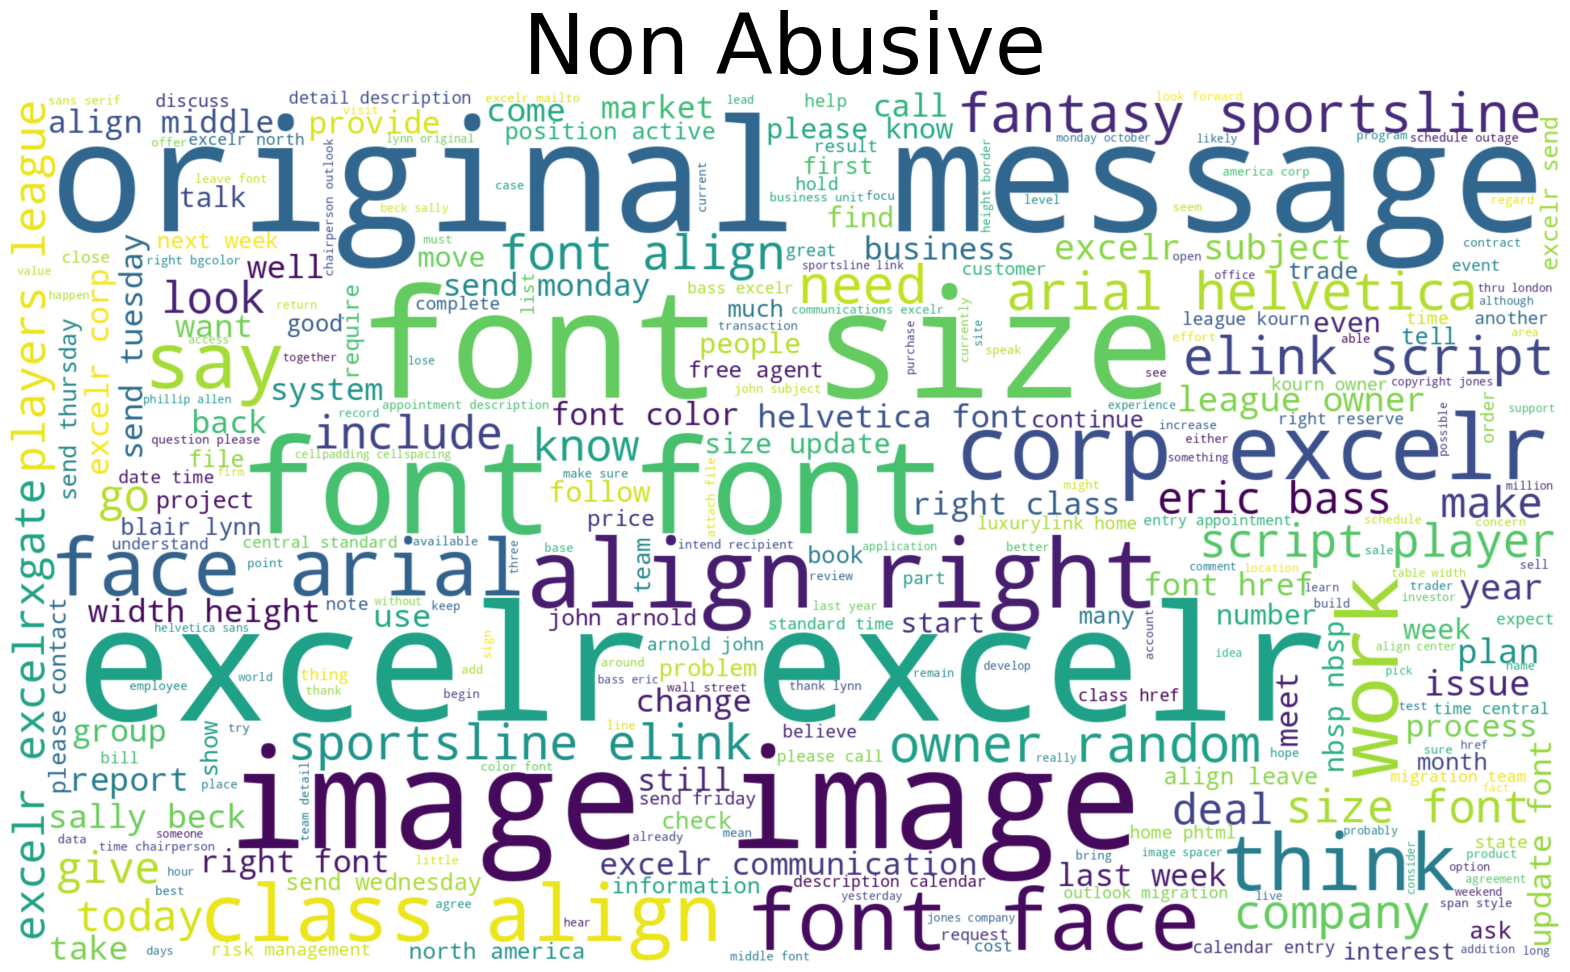

In [36]:
# Create a wordcloud for Non Abusive  class
all_text = " ".join(df[df["Class"] == "Non Abusive"].filtered_content)
make_wordcloud(all_text, "Non Abusive")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='words'>

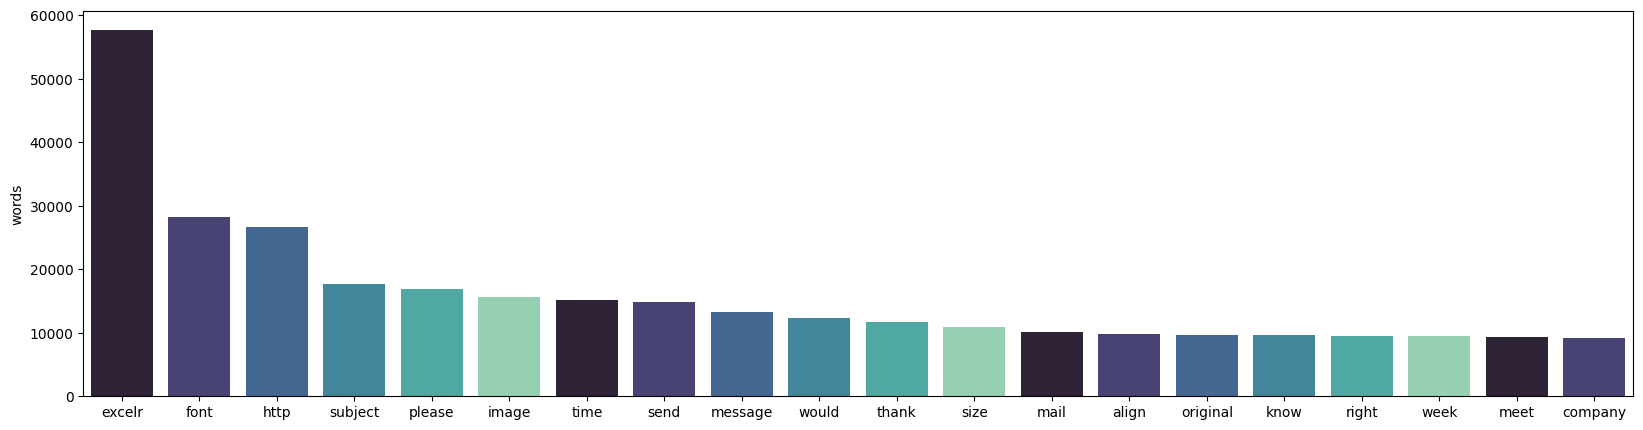

In [37]:
# Create a graph for Politics class
count = pd.DataFrame(all_text.split(), columns = ['words'])
top_10 = count[count['words'].isin(list(count.words.value_counts()[:20].index[:20]))]
plt.figure(figsize=(20,5))
sns.barplot(x = top_10.words.value_counts().index,
            y = top_10.words.value_counts(), palette = sns.color_palette("mako"))

In [38]:
# Connect Google Drive to Colab Notebooks
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/gdrive


In [44]:
# Save model to Google Drive.
lda_model.save('/content/gdrive/MyDrive/LDA_Model')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# Checking if model saved
!ls /content/gdrive/MyDrive/LDA_Model

/content/gdrive/MyDrive/LDA_Model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
